This notebook reproduces the plots in section 4.(AWA Experiment and Benchmark) from the paper ["Benchmarking Collective Effects of Electron Interactions in a Wiggler with OPAL-FEL"](https://arxiv.org/pdf/2112.02316.pdf). 

Run all the cells in this notebook while following the instructions.

In [1]:
# For this notebook to work you require access to the AWA experiment data. Enter here the path where you store the experiment data.
exp_path = '/psi/home/albajacas_a/data/awa_experiment_data/' 

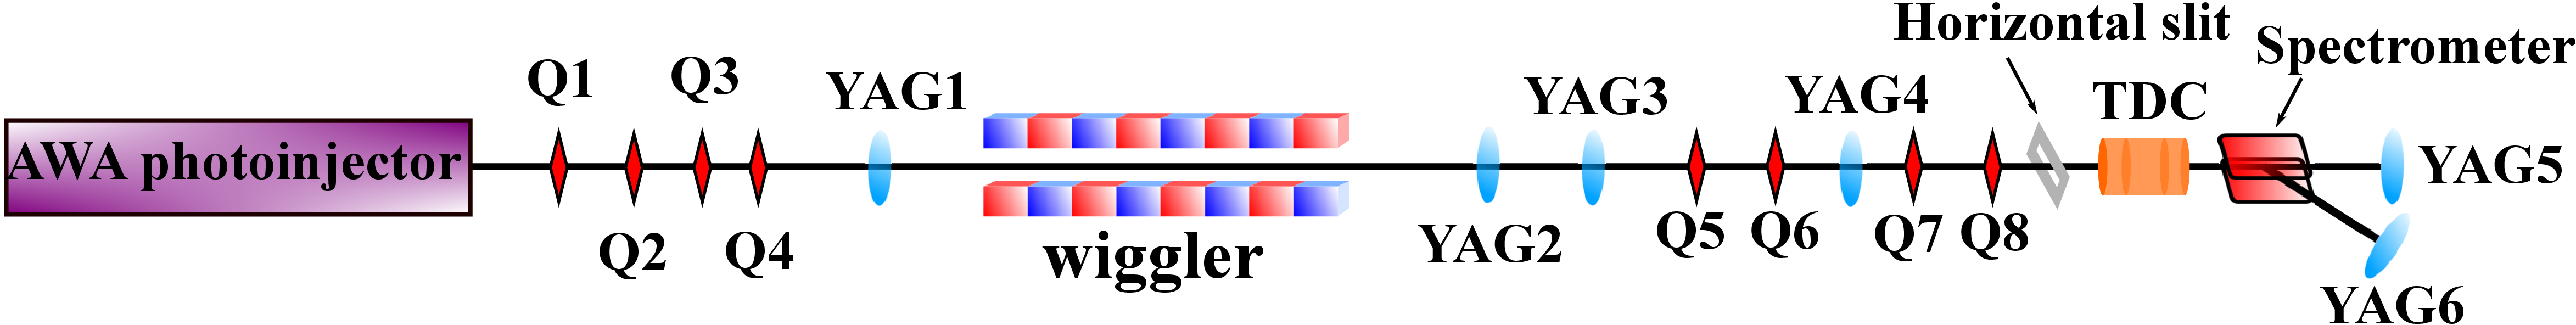

In [2]:
from IPython.display import Image, display
display(Image('layout.png'))

In [13]:
# Load custom plotting library.
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1,'../')
import plotting_functions as pmf

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse

# Such that backgrounds of plots are white and not transparent.
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

import numpy as np
import pandas as pd
import os
import h5py

fs = 17  # Fontsize for plots.
dQ = 10  # Tolerance accepted in pC when computing average of experimental shots.

sim_path = 'simulation_elliptic'

rotation = 0.0  # Rotation of YAG screens. Assume it is zero, since it is small and from tests appears to be negligible.

Lreal = 50  # Yag size in mm.
spec = 0.365 * 1e3  # Spectrometer conversion factor in mm. E.g. if the spectrometer is on, σ_x/spec = dE/E.
E = 45.4  # Mean energy of beam throughout the experiment. 
TDC = 2.872  # TDC conversion factor.
maxHH = 0.3  # Max height of normalised histograms.

# Length from YAG1 to the spectrometer, taken from measurements at AWA.
Ldr = (207 + 123.55 + 23.5 + 25.5 + 76.3 + 57.5 + 24.5 + 59 + 32.75 + 49) * 1e-2
print("Length of simulated section =", Ldr, 'm')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Length of simulated section = 6.7860000000000005 m


# YAG5, all off, xFocusing

We firstly look at the x-y bunch on YAG5, with the spectrometer and TDC **both off**. Here xFocusing means that the quads (Q5-Q8) are set up for the spectrometer measurements, so the $\sigma_x$ of the bunch on YAG5 will be the uncertainty of the energy measurement when we later turn on the spectrometer.

## Wiggler out

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


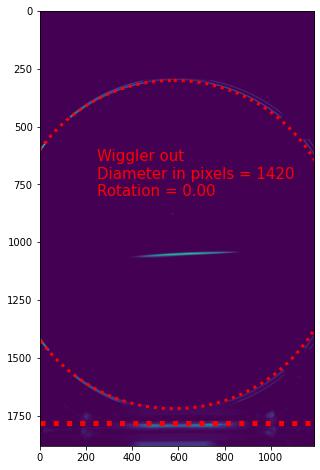

In [4]:
# Find the YAG diameter in pixels.

i = 1  # Shot number (any number 1-50, since all shots have same YAG size and camera setting).
print('shot', i)
fn = exp_path + 'YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

Lyag5 = 1420  # Play around with this parrameter until the circle in the image matches the circle on the YAG. Then we will have found the diamater of the YAG in pixels.

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag5, rotation), 
        color = 'red', fontsize = 15)
ax.axhline(1780, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation.
ax.add_patch(Ellipse((580, 1010), Lyag5, Lyag5, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

In [5]:
# Charge scan: integrate the charge for all measurements and summarise it on a file.
# Also, find the cases within (300+-dQ) pC.

fn = exp_path + 'YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/'
best_cases = []
Qs = []
charge_scan = np.zeros(50)

for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

# Sort the best cases
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 3 has -302.40859390792326 pC
case 30 has -304.22877531370307 pC
case 37 has -306.89702604407125 pC
case 39 has -307.38523827736856 pC
case 43 has -309.24655815334694 pC



wig out shot number 3
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/Imag_raw_Shot_003.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -302.41 pC

wig out shot number 30
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/Imag_raw_Shot_030.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -304.23 pC

wig out shot number 37
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/Imag_raw_Shot_037.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -306.90 pC

wig out shot number 39
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/Imag_raw_Shot_039.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -307.39 pC


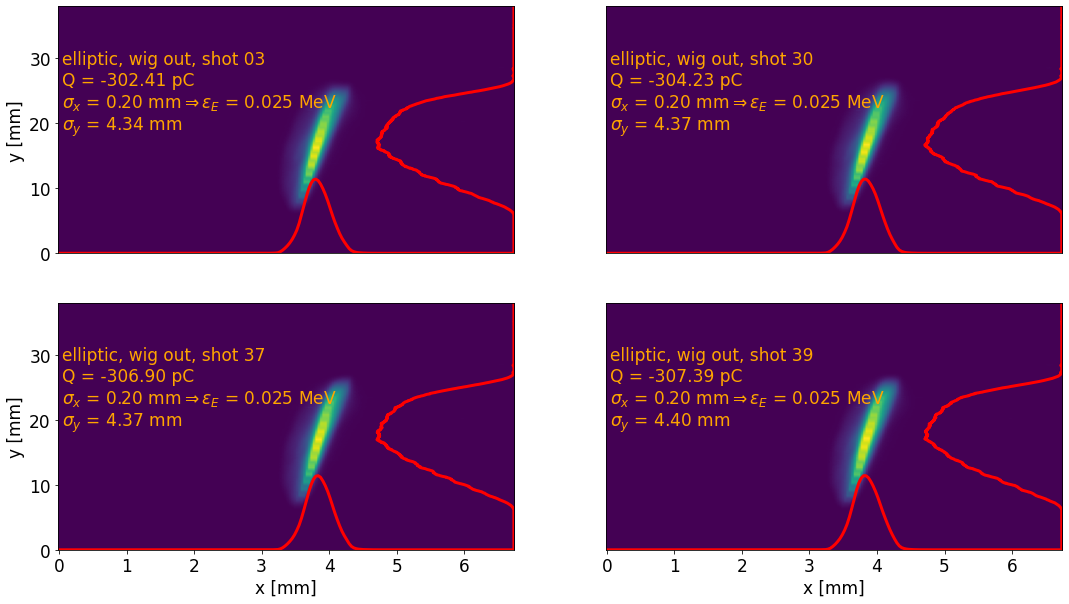

In [6]:
# Plot the 4 shots closest to 300 pC.

fn = exp_path + 'YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_out/'

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.05,.95,.5,.6], rot = rotation, size_filter = 4)
    Mout = Mout.T
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag5  # Transform pixels to mm

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsx = pmf.getRms(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'elliptic, wig out, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               '$\sigma_x$ = {:.2f} mm'.format(rmsx) +
               '$\Rightarrow\epsilon_E$ = {:.3f} MeV\n'.format(rmsx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

We conclude that in the wiggler-out spectrometer measurements there is a **0.025 MeV uncertainty**.

## Wiggler in

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


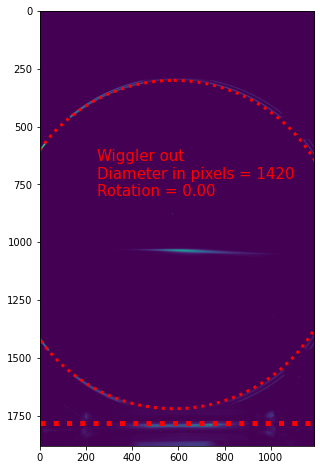

In [7]:
# Find the YAG diameter in pixels.

i = 1  # Shot number (any number 1-50, since all shots have same YAG size and camera setting).
print('shot', i)
fn = exp_path + 'YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

Lyag5 = 1420  # Play around with this parrameter until the circle in the image matches the circle on the YAG. Then we will have found the diamater of the YAG in pixels.

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag5, rotation), 
        color = 'red', fontsize = 15)
ax.axhline(1780, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation.
ax.add_patch(Ellipse((580, 1010), Lyag5, Lyag5, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

In [8]:
# Charge scan: integrate the charge for all measurements and summarise it on a file.
# Also, find the cases within (300+-dQ) pC

fn = exp_path + 'YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/'
best_cases = []
Qs = []
charge_scan = np.zeros(50)

for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

# Sort the best cases.
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 13 has -296.53944689445467 pC
case 15 has -300.8965925693113 pC
case 30 has -300.8235734057189 pC
case 36 has -291.89934342927023 pC
case 44 has -298.1997355297181 pC
case 47 has -290.1305773958506 pC
case 49 has -305.0589269943396 pC



wig out shot number 30
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/Imag_raw_Shot_030.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -300.82 pC

wig out shot number 15
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/Imag_raw_Shot_015.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -300.90 pC

wig out shot number 44
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/Imag_raw_Shot_044.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -298.20 pC

wig out shot number 13
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/Imag_raw_Shot_013.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -296.54 pC


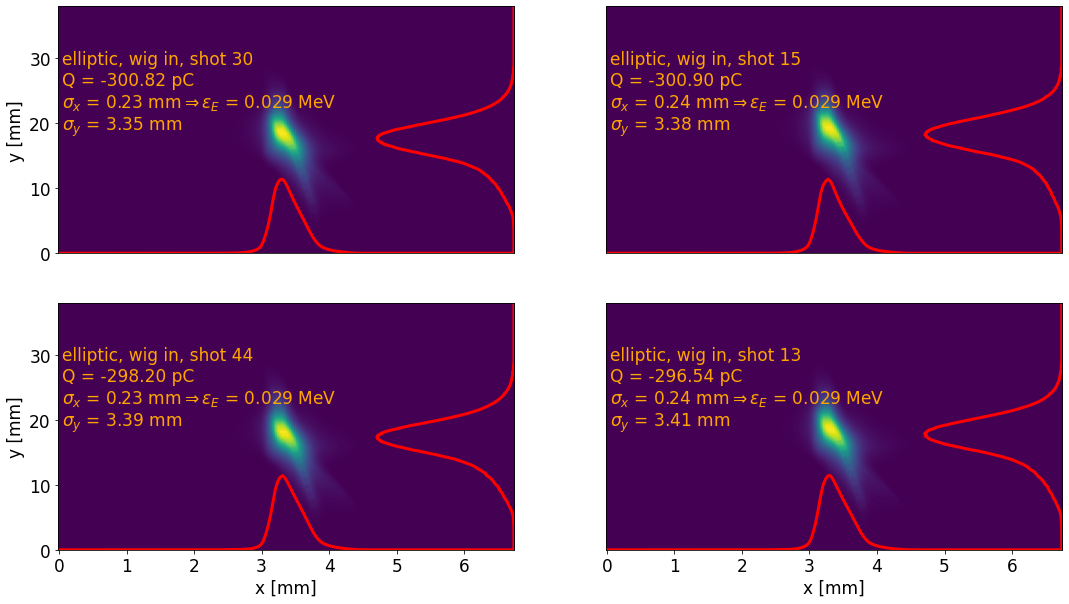

In [9]:
# Plot the 4 shots closest to 300 pC.

fn = exp_path + 'YAG5_allOff_xFocusing-for-spect-only/elliptic/wig_in/'

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.05,.95,.5,.6], rot = rotation, size_filter = 4)
    Mout = Mout.T
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag5  # Transform pixels to mm

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsx = pmf.getRms(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'elliptic, wig in, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               '$\sigma_x$ = {:.2f} mm'.format(rmsx) +
               '$\Rightarrow\epsilon_E$ = {:.3f} MeV\n'.format(rmsx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image.
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

We conclude that in the wiggler-out spectrometer measurements there is a **0.03 MeV uncertainty**.

# YAG5, TDCon, spect off

## Wiggler out

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_out/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


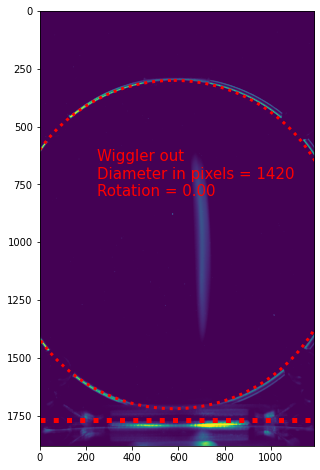

In [10]:
# Check the YAG size in pixels. Since it is the same camera as the previous measurements, we expect Lyag5 ot be unchanged.

i = 1  # Shot number.
print('shot', i)
fn = exp_path + 'YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_out/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag5, rotation), color = 'red', fontsize = 15)

ax.axhline(1770, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1010), Lyag5, Lyag5, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

In [11]:
# Charge scan: integrate the charge for all measurements and summarise it on a file.
# Also, find the cases within (300+-dQ) pC.

fn = exp_path + 'YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_out/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')


# Sort the best cases.
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 9 has -292.07990243768614 pC
case 42 has -299.7407504464859 pC



wig out shot number 42
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_out/Imag_raw_Shot_042.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.74 pC

wig out shot number 9
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_out/Imag_raw_Shot_009.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -292.08 pC


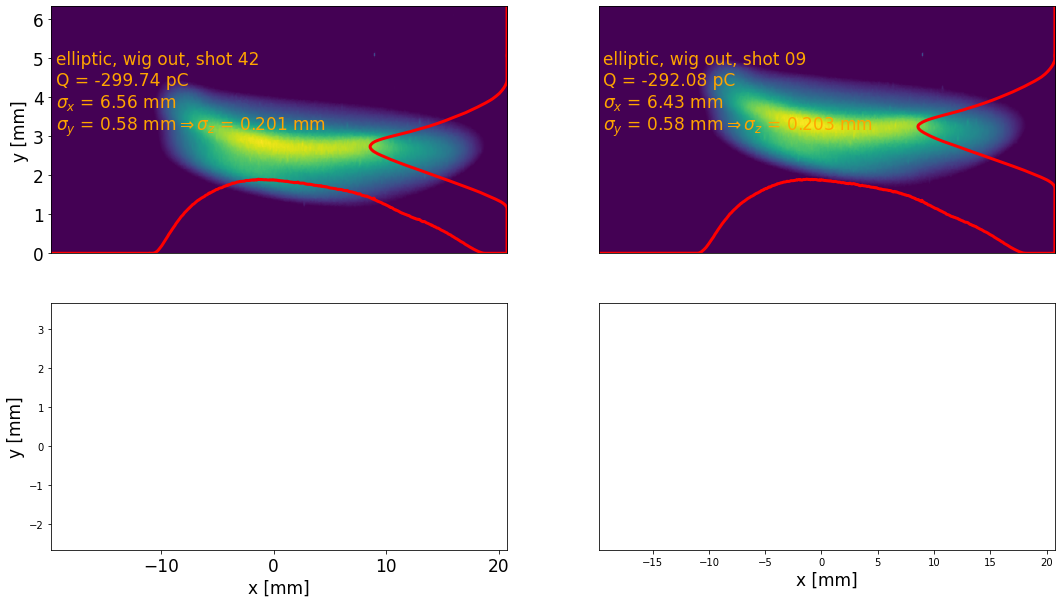

In [14]:
# Plot the 4 shots closest to 300 pC.

fn = exp_path + 'YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_out/'

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.5,.65,.2,.8], rot = rotation, size_filter = 4)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag5

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsx = pmf.getRms(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'elliptic, wig out, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy) +
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

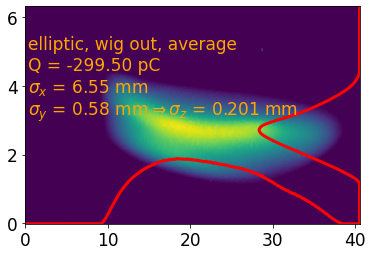

In [15]:
# Do a weighted average of the 4 shots, to get the "average shot at 300 pC".

[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Lyag5

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge.
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsx = pmf.getRms(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, sim_path + '/average_wigOut_TDCon.txt')
# Text with info
ax.text(.01, .5, 'elliptic, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

## Wiggler in

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


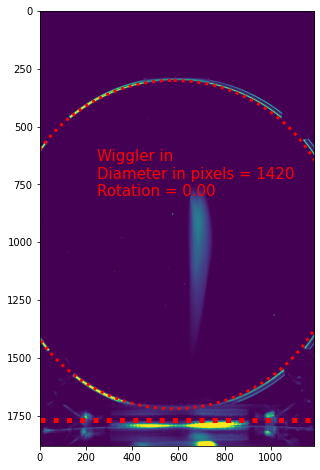

In [16]:
# Verify YAG5 diameter in pixels.

i = 1  # Shot number.
print('shot', i)
fn = exp_path + 'YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler in\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag5, rotation), color = 'red', fontsize = 15)

ax.axhline(1770, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation.
ax.add_patch(Ellipse((580, 1010), Lyag5, Lyag5, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()


In [17]:
# Charge scan: integrate the charge for all measurements and summarise it on a file.
# Also, find the cases within (300+-dQ) pC.

fn = exp_path + 'YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')


# Sort the best cases.
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 1 has -305.62686666250744 pC
case 5 has -293.1189049406119 pC
case 13 has -294.23545219420834 pC
case 14 has -299.12409081696336 pC
case 15 has -302.5554233717668 pC
case 21 has -296.3166454404415 pC
case 27 has -306.99508105151443 pC
case 31 has -301.143296153964 pC
case 40 has -294.1639654649595 pC



wig in shot number 14
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/Imag_raw_Shot_014.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.12 pC

wig in shot number 31
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/Imag_raw_Shot_031.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -301.14 pC

wig in shot number 15
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/Imag_raw_Shot_015.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -302.56 pC

wig in shot number 21
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/Imag_raw_Shot_021.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -296.32 pC


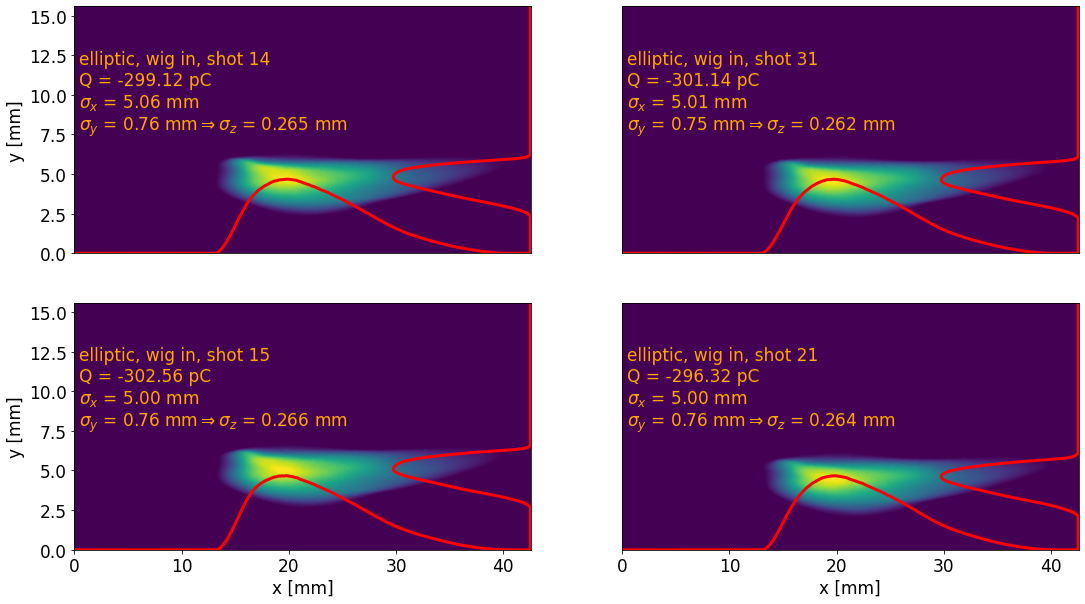

In [18]:
# Plot the 4 shots closest to 300 pC.

fn = exp_path + 'YAG5_TDC=on_spect=off_yFocusing/elliptic/wig_in/'

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig in shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.35,.72,.2,.83], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag5

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsx = pmf.getRms(x, hist)
    laterx = [x,hist]
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    latery = [x,hist]
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'elliptic, wig in, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy) +
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

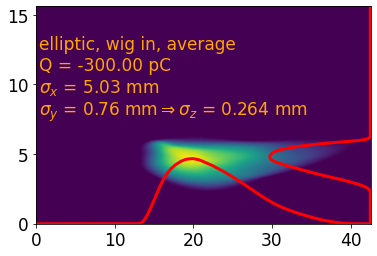

In [19]:
# Do a weighted average of the 4 shots, to get the "average shot at 300 pC".

[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Lyag5

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsx = pmf.getRms(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, sim_path + '/average_wigIn_TDCon.txt')
# Text with info
ax.text(.01, .5, 'elliptic, wig in, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

# YAG6, TDC off, spect on

## Wiggler out

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


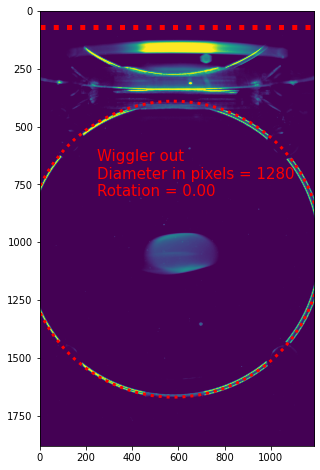

In [37]:
# Find diameter of YAG6 in pixels.

i = 1  # Shot number.
print('shot', i)
fn = exp_path + 'YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

Lyag6 = 1280  # Change this number such that the circle in the plots fits the YAG size.
fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag6, rotation), color = 'red', fontsize = 15)

ax.axhline(70, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation.
ax.add_patch(Ellipse((580, 1030), Lyag6, Lyag6, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

In [38]:
# Charge scan: integrate the charge for all measurements and summarise it on a file.
# Also, find the cases within (300+-dQ) pC.

fn = exp_path + 'YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

# Sort cases closest to 300 pC.
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 16 has -295.38406360198763 pC
case 18 has -294.7858708695525 pC
case 26 has -294.78836107799873 pC
case 39 has -298.3426666613725 pC



wig out shot number 39
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/Imag_raw_Shot_039.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -298.34 pC

wig out shot number 16
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/Imag_raw_Shot_016.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -295.38 pC

wig out shot number 26
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/Imag_raw_Shot_026.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -294.79 pC

wig out shot number 18
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/Imag_raw_Shot_018.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -294.79 pC


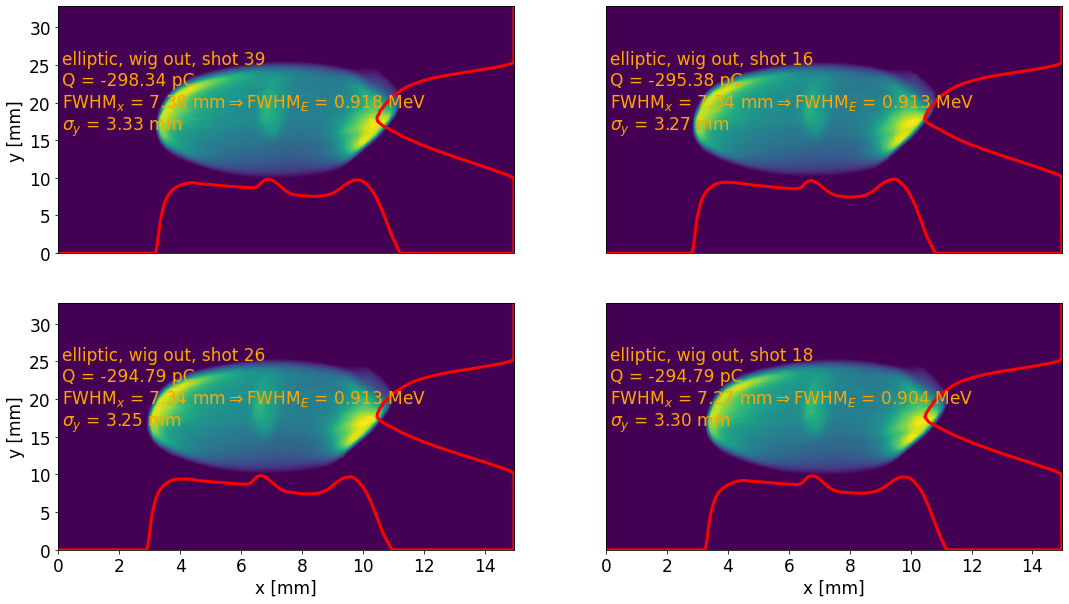

In [39]:
# Plot the 4 shots closest to 300 pC.

fn = exp_path + 'YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_out/'

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.2,.9,.47,.67], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag6

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'elliptic, wig out, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

384 and (384, 840)
Removing peak at index 205


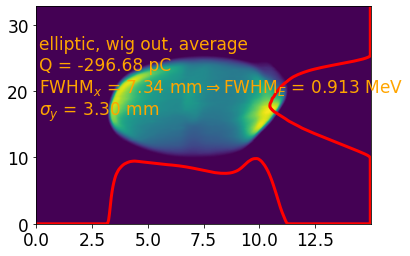

In [40]:
# Do a weighted average of the 4 shots, to get the "average shot at 300 pC".

[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Lyag6
[M,_] = pmf.remove_bump(M, axis = 0, plot = False)

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, sim_path + '/average_wigOut_specton.txt')

# Text with info
ax.text(.01, .5, 'elliptic, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

## Wiggler in

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


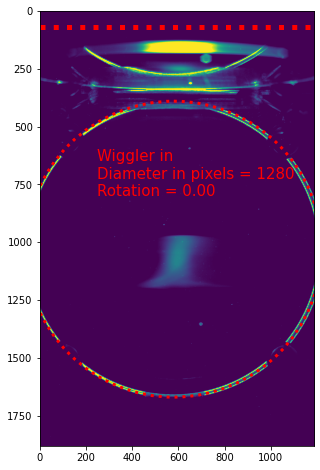

In [24]:
# Verify size of YAG6 is the same.

i = 1  # Shot number.
print('shot', i)
fn = exp_path + 'YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler in\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag6, rotation), color = 'red', fontsize = 15)

ax.axhline(70, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1030), Lyag6, Lyag6, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

In [25]:
# Charge scan: integrate the charge for all measurements and summarise it on a file.
# Also, find the cases within (300+-dQ) pC.

fn = exp_path + 'YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

# Order shots closest to 300 pC.
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 7 has -290.09520362612994 pC
case 8 has -301.5201011510002 pC
case 10 has -294.06916174593727 pC
case 11 has -309.002292494541 pC
case 14 has -300.66348128376484 pC
case 15 has -307.1008621533366 pC
case 18 has -303.8465932826466 pC
case 25 has -296.81620379431547 pC
case 26 has -293.19287235781076 pC
case 30 has -299.91717079913616 pC
case 38 has -302.1972912731177 pC
case 39 has -297.3757634124272 pC
case 45 has -298.1576089635201 pC
case 48 has -298.9755574418801 pC



wig in shot number 30
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/Imag_raw_Shot_030.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.92 pC

wig in shot number 14
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/Imag_raw_Shot_014.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -300.66 pC

wig in shot number 48
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/Imag_raw_Shot_048.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -298.98 pC

wig in shot number 8
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/Imag_raw_Shot_008.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -301.52 pC


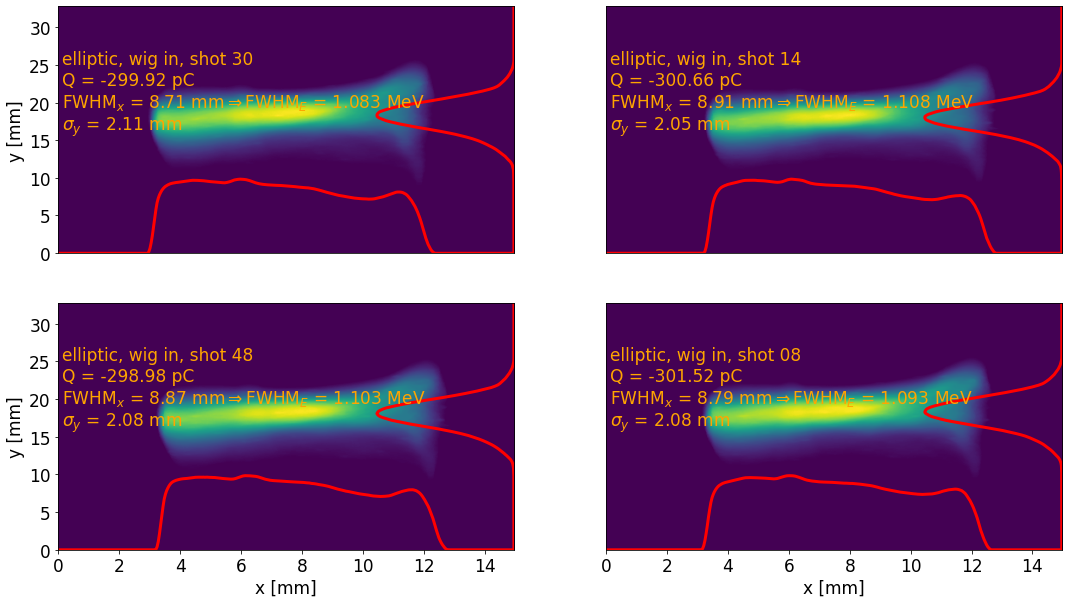

In [26]:
# Plot and save in memory the 4 shots closest to 300 pC.

fn = exp_path + 'YAG6_TDC=off_spect=on_xFocusing/elliptic/wig_in/'

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig in shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.2,.9,.47,.67], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag6

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'elliptic, wig in, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

384 and (384, 840)
Removing peak at index 230


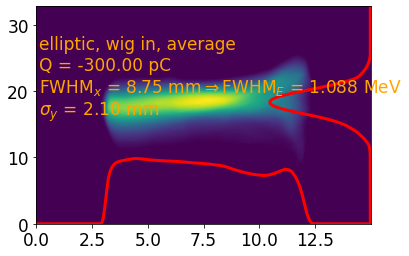

In [27]:
# Do a weighted average of the 4 best shots to get the "average shot at 300 pC".

[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Lyag6
[M,_] = pmf.remove_bump(M, axis = 0, plot = False)

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, sim_path + '/average_wigIn_specton.txt')

# Text with info.
ax.text(.01, .5, 'elliptic, wig in, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

# YAG6 LPS, TDC on, spect on

## Wiggler out

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_out/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


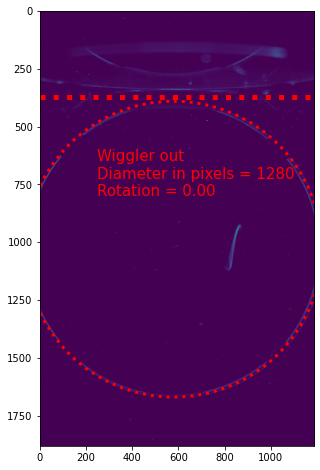

In [28]:
# Verify the diameter of YAG6 in pixels.

i = 1  # Shot number.
print('shot', i)
fn = exp_path + 'YAG6_LPS_slit_in/elliptic/wig_out/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag6, rotation), color = 'red', fontsize = 15)

ax.axhline(370, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation.
ax.add_patch(Ellipse((580, 1030), Lyag6, Lyag6, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

In [29]:
# Compute charges of each shot find the ones with Q= (300 +- dQ) pC.

fn = exp_path + 'YAG6_LPS_slit_in/elliptic/wig_out/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

# Order the shots according to how close they are to 300 pC.
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 2 has -290.8590208713954 pC
case 27 has -299.8893457382899 pC
case 43 has -306.26064600934865 pC
case 47 has -297.0827581444943 pC



wig out shot number 27
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_out/Imag_raw_Shot_027.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.89 pC

wig out shot number 47
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_out/Imag_raw_Shot_047.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -297.08 pC

wig out shot number 43
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_out/Imag_raw_Shot_043.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -306.26 pC

wig out shot number 2
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_out/Imag_raw_Shot_002.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -290.86 pC


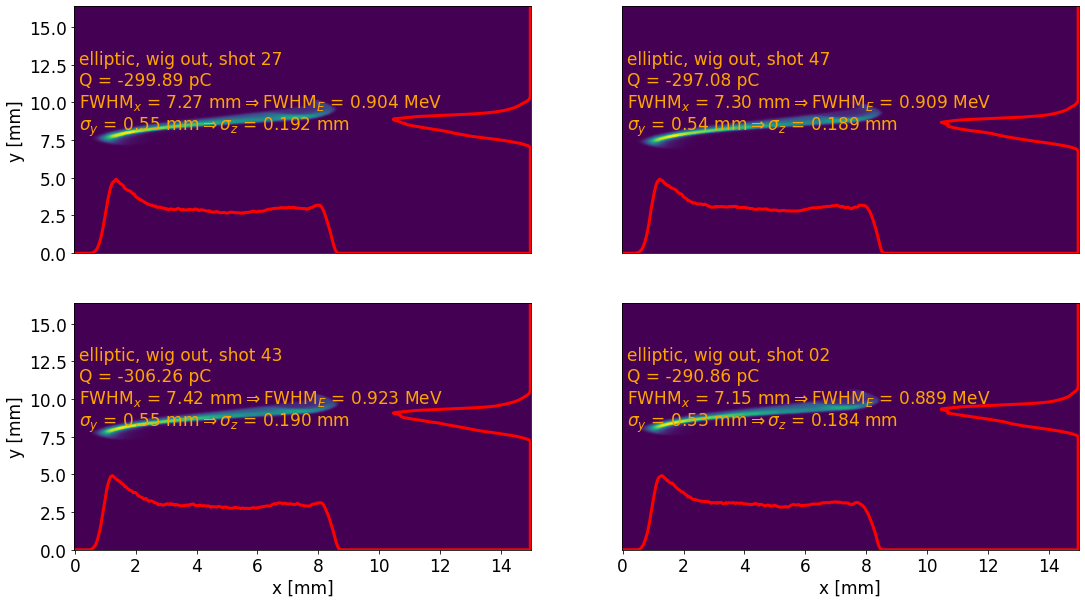

In [30]:
# Now plot and save in memory the 4 shots closest to 300 pC.

fn = exp_path + 'YAG6_LPS_slit_in/elliptic/wig_out/'

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.55,.9,.48,.68], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag6

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge.
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info.
    ax[i].text(.01, .5, 'elliptic, wig out, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale.
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary.
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image.
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

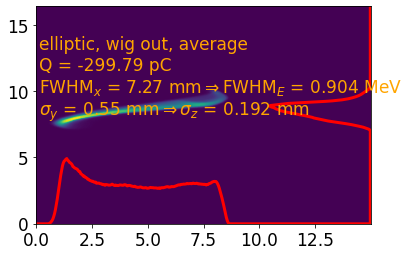

In [31]:
# Do a weighted average of the 4 shots, to get the "average shot at 300 pC".

[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Lyag6

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist, denom = 2.)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, sim_path + '/average_wigOut_LPS.txt')

# Text with info
ax.text(.01, .5, 'elliptic, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

## Wiggler in

shot 1
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_in/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


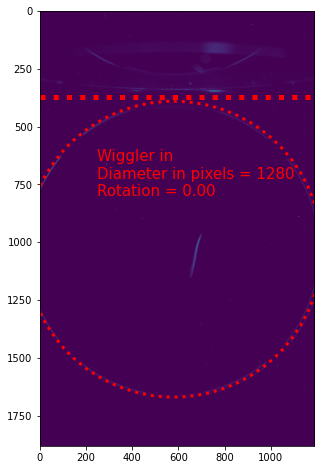

In [32]:
# Verify YAG6 diameter in pixels.

i = 1  # Shot number.
print('shot', i)
fn = exp_path + 'YAG6_LPS_slit_in/elliptic/wig_in/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler in\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Lyag6, rotation), color = 'red', fontsize = 15)

ax.axhline(370, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation.
ax.add_patch(Ellipse((580, 1030), Lyag6, Lyag6, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

In [33]:
# Charge scan: integrate the charge of each shot and write to a file,
# and save in memory the shots with Q = (300 +- dQ) pC.

fn = exp_path + 'YAG6_LPS_slit_in/elliptic/wig_in/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

# Sort the shots depending on how close they are to 300 pC.
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 21 has -300.9512545524894 pC
case 34 has -299.0459134514498 pC



wig in shot number 21
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_in/Imag_raw_Shot_021.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -300.95 pC

wig in shot number 34
opening /psi/home/albajacas_a/data/awa_experiment_data/YAG6_LPS_slit_in/elliptic/wig_in/Imag_raw_Shot_034.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.05 pC


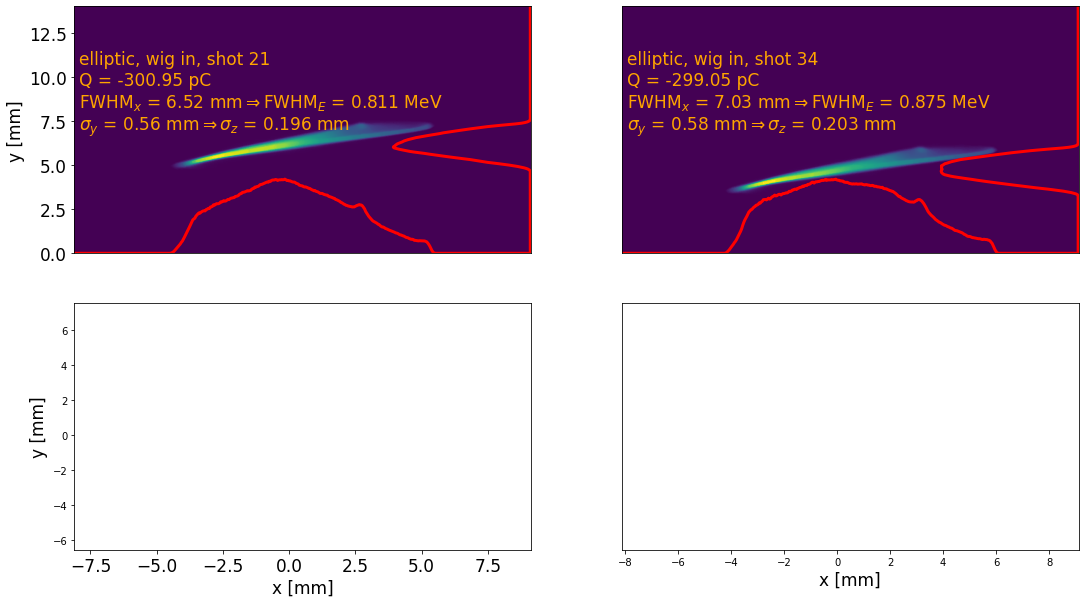

In [34]:
# Plot the 4 shots closest to 300 pC. In this case there were only 3 shots with Q = (300 +- dQ) pC.

fn = exp_path + 'YAG6_LPS_slit_in/elliptic/wig_in/'

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig in shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.4,.7,.45,.68], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Lyag6

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge.
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info.
    ax[i].text(.01, .5, 'elliptic, wig in, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale.
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary.
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

# Save the image.
# plt.savefig((pltpath + '/YAG_to_OPAL_distro_case3_August2021.png'),bbox_inches='tight')
plt.show()

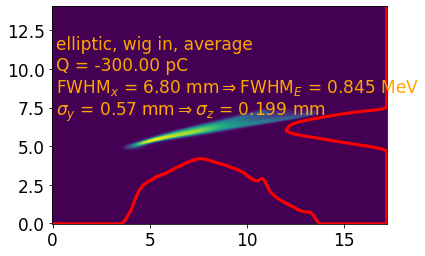

In [36]:
# Do a weighted average of the 4 shots, to get the "average shot at 300 pC".

[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Lyag6

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge.
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, sim_path + '/average_wigIn_LPS.txt')

# Text with info.
ax.text(.01, .5, 'elliptic, wig in, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

# Reconstruct bunch at the spectrometer

## Wiggler out

### Get LPS at the spectrometer

Getting LPS
Getting Spect only
Getting TDC only
Replacing the E distribution with the one from the spectrometer

 Interpolating...
generating particles...
0 particles have been generated
50000 particles have been generated
100000 particles have been generated
150000 particles have been generated
200000 particles have been generated
250000 particles have been generated
300000 particles have been generated
350000 particles have been generated
400000 particles have been generated
450000 particles have been generated
Finally we have 421315 particles


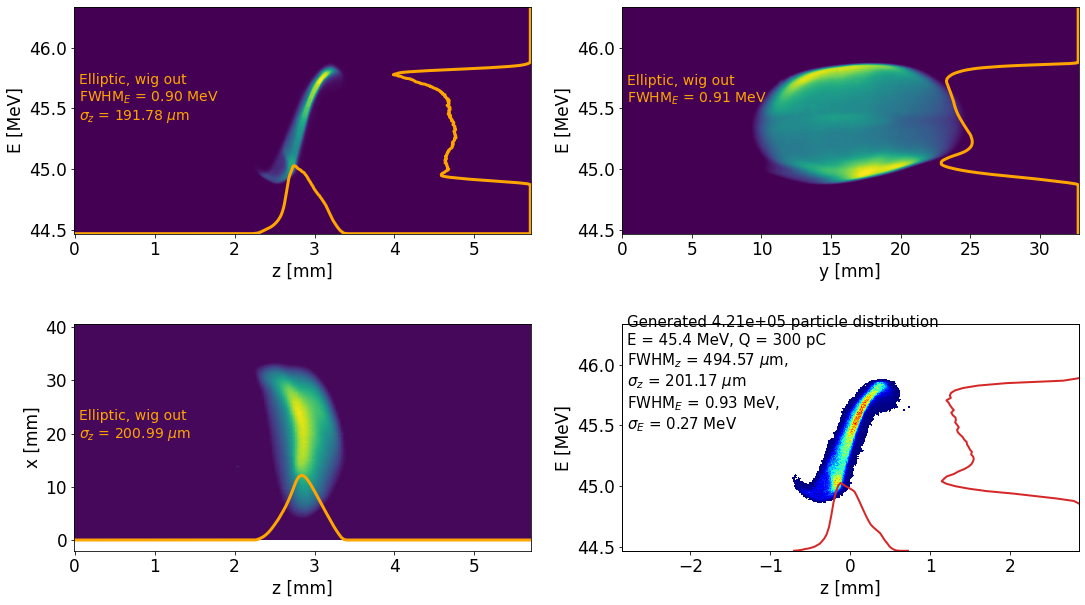

In [42]:
# Generate (z,pz) phase-space distribution from the shots on YAG5 and YAG6.

fig,axs = plt.subplots(2,2, figsize = (18,10))
fig.subplots_adjust(hspace=0.4)
   
np.random.seed(42)    
   
pmf.sample_3Ms(axs, LPS_fn = sim_path + '/average_wigOut_LPS.txt', 
           specton_fn = sim_path + '/average_wigOut_specton.txt', 
          TDCon_fn = sim_path + '/average_wigOut_TDCon.txt',
          out_fn = sim_path + '/wigOut_LPS.tsv', Npart = 5*10**5,
          casename = 'Elliptic, wig out', show_info = True,
               plot_trafos = False, 
               sample = True)

axs = axs.reshape(-1)
for i in range(4):
    axs[i].tick_params(axis = 'both', labelsize = fs)
    axs[i].set_xlabel('z [mm]', fontsize = fs)
    axs[i].set_ylabel('E [MeV]', fontsize = fs)
axs[1].set_xlabel('y [mm]', fontsize = fs)
axs[2].set_ylabel('x [mm]', fontsize = fs)

# plt.savefig(pltpath + '/LPS_DYG14_case3_wigOut_noSampling.png', bbox_inches = 'tight')
plt.show()

### Get Twiss params from YAG1 and transport them to the spectrometer

In [43]:
# From measuremenets of YAG(1-3) we know the emittance and Twiss parameters at YAG1. 
# We calculate the transverse x, px, y, py, and correlations, from these Twiss parameters.

g = E / .511
bg = g * np.sqrt(1 - 1 / g**2)

epsx = 31.7e-6 / bg
epsy = 17.1e-6 / bg

betax  = 20
alphax = 0.229
gammax = (1 + alphax**2) / betax
sigx   = np.sqrt(epsx * betax)
sigpx  = np.sqrt(epsx * gammax) * bg
corrx  = -np.sqrt(1 - 1 / (betax * gammax))

betay  = 2.84
alphay = 0.926
gammay = (1 + alphay**2) / betay
sigy   = np.sqrt(epsy * betay)
sigpy  = np.sqrt(epsy * gammay) * bg
corry  = -np.sqrt(1 - 1 / (betay * gammay))

init_params = [sigx, corrx, sigpx, sigy, corry, sigpy, E]

gamma 88.84540117416829
Initial state
 [[ 7.13644325e-06 -8.17070991e-08  0.00000000e+00  0.00000000e+00]
 [-8.17070991e-08  1.87743349e-08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.46647050e-07 -1.78226445e-07]
 [ 0.00000000e+00  0.00000000e+00 -1.78226445e-07  1.25874720e-07]]
Transfer matrix M
 [[1.   0.05 0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.05]
 [0.   0.   0.   1.  ]]
number of particles is 421315

Saving particles in file...


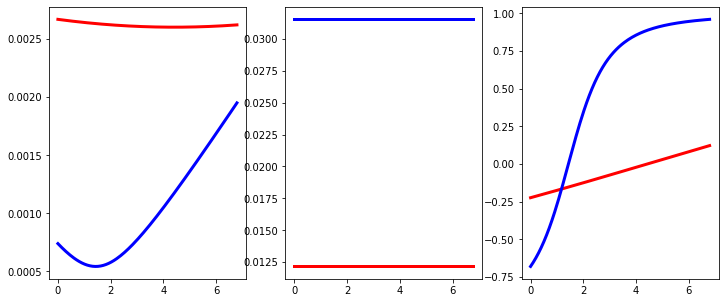

In [44]:
# Now, using linear transport matrices, we transport the transverse bunch parameters form YAG1 to the spectromter.

trans = pmf.get_transverse_params(init_params, 
                                  L = Ldr, l = 0.05, plot = True)

# We now generate the full 6D phase-space at the spectrometer. We use the (z,pz) distribution that we sampled earlier, and the transverse Twiss parameters to sample the (x,y,px,py) phase-space.

pmf.generate_transverse_phase_space(sim_path + '/wigOut_LPS.tsv', trans, 
                                    sim_path + '/back_track_drift/initDist.dat',
                                    E = 45.4, plot = False, 
                                    plotFile = sim_path + '/myPlot.png', 
                                    lw = 5, color = 2)

You can now run the back-tracking simulation. This simulation will back-track the bunch (using the OPAL 3D space-charge solver) from the spectrometer to YAG1.

Run this simulation from `awa_paper_2021/AWA_sim_and_exp/simulation_elliptic/back_track_drift/`, with 
```
mpirun $OPAL_EXE_PATH/opal back_track_drift.in
```

If you are working on Merlin, you can use the batch script 
```
sbatch run.merlin6
```

### Check that back-tracking worked correctly

simulation_elliptic/back_track_drift/back_track_drift.stat
gamma 87.84021617084109
Initial state
 [[6.88080989e-06 4.43401116e-08 0.00000000e+00 0.00000000e+00]
 [4.43401116e-08 1.91378674e-08 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.80694331e-06 6.73177113e-07]
 [0.00000000e+00 0.00000000e+00 6.73177113e-07 1.29030755e-07]]
Transfer matrix M
 [[ 1.   -0.05  0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    1.   -0.05]
 [ 0.    0.    0.    1.  ]]


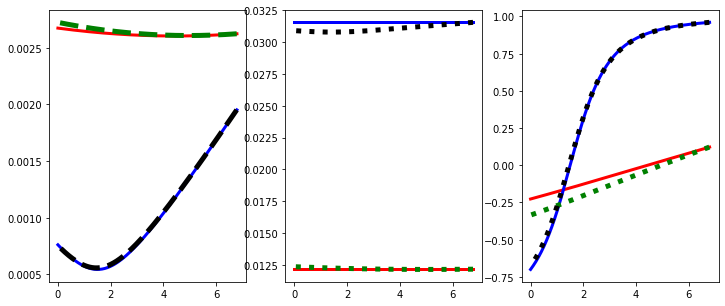

In [45]:
# Compare the OPAL back-tracking simulation to the matrix transport method.
# We should see that both lines behave similarly. Recall that OPAL includes space-charge, but the matrix transport method does not.

trans = pmf.get_transverse_params_with_file(sim_path + '/back_track_drift/back_track_drift.stat', 
                              L = Ldr, l = -0.05, plot = True)

spos =  [0.]


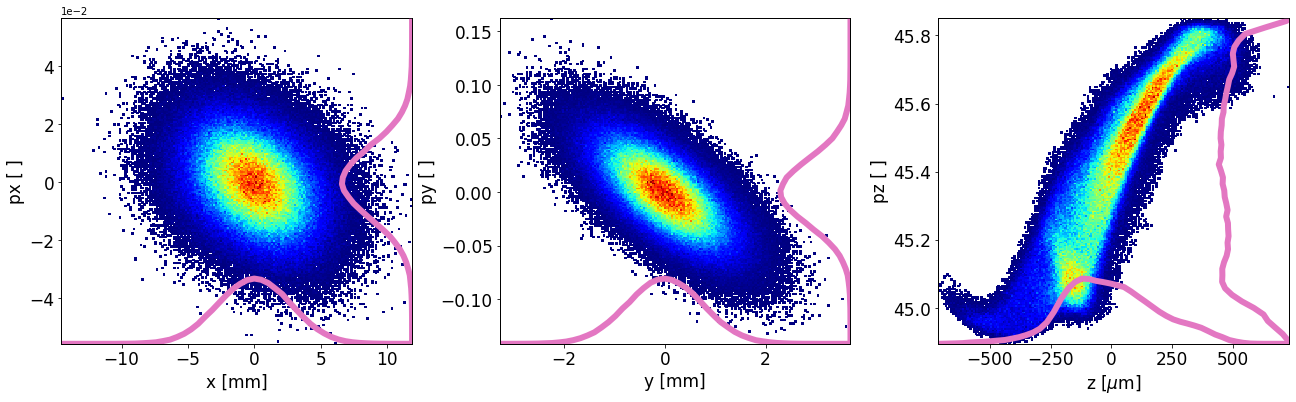

In [46]:
# Plot the 6D phase-space at YAG1, which is the phase-space at the final step of the back-tracking simulation.

lw = 6
color = 6

f = h5py.File(sim_path + '/back_track_drift/back_track_drift.h5', 'r')
print('spos = ', f['Step#0'].attrs['SPOS'])
dfloc = pd.DataFrame({'x':np.asarray(f['Step#0/x']),
                   'px':np.asarray(f['Step#0/px']),
                   'y':np.asarray(f['Step#0/y']),
                   'py':np.asarray(f['Step#0/py']),
                   'z':np.asarray(f['Step#0/z']),
                   'pz':np.asarray(f['Step#0/pz']),
                  })

fig,axs = plt.subplots(1, 3, figsize = (22,6))
fig.subplots_adjust(wspace=.25)
axs = axs.reshape(-1)

pmf.plotScreenXY(axs[0], dfloc['x'], dfloc['px'], ['x', 'px'], 
                 type = 'hist2d-hist', factors = [1e3, 1], 
                 nbins = 200, color = color, maxHH = .2, enable_cbar = 0, lw = lw)

pmf.plotScreenXY(axs[1], dfloc['y'], dfloc['py'], ['y', 'py'], 
                 type = 'hist2d-hist', factors = [1e3, 1], 
                 nbins = 200, color = color, maxHH = .2, enable_cbar = 0, lw = lw)
pmf.plotScreenXY(axs[2], dfloc['z']-np.mean(dfloc['z']), dfloc['pz']*.511*1e6, ['z', 'E'], 
                 type = 'hist2d-hist', factors = [1e6, 1e-6], 
                 nbins = 200, color = color, maxHH = .2, enable_cbar = 0, lw = lw)

axlab = ['x', 'y', 'z']
for i in range(3):
    axs[i].tick_params(axis = 'both', labelsize = fs)
    axs[i].set_xlabel(axlab[i] + ' [mm]', fontsize = fs)
    axs[i].set_ylabel('p' + axlab[i] + ' [ ]', fontsize = fs)
axs[2].set_xlabel(axlab[i] + ' [$\mu$m]', fontsize = fs)

# plt.savefig((pltpath + '/' + plotFile),bbox_inches='tight')
plt.show()

using directory simulation_elliptic/back_track_drift/
spos =  [0.]

Saving particles in file...


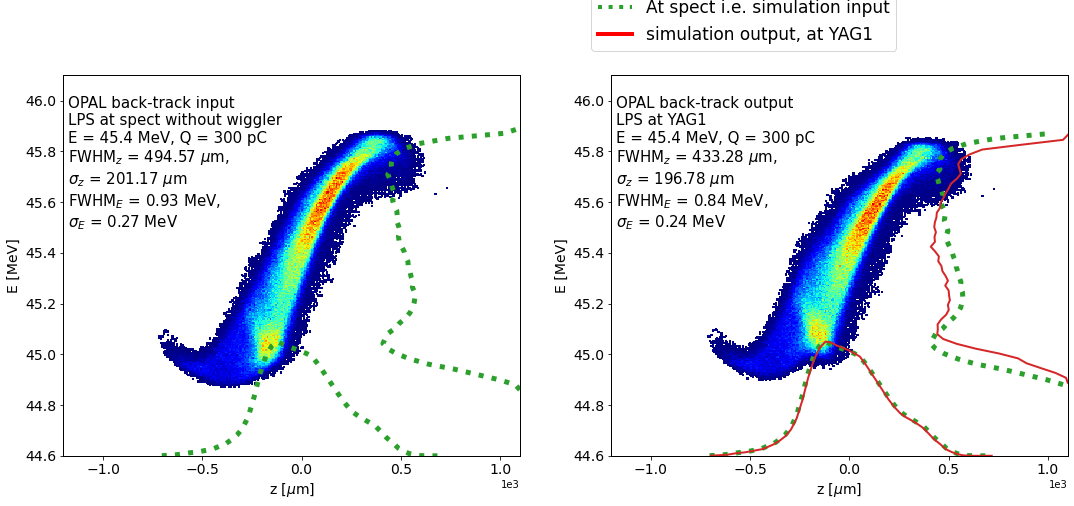

In [47]:
# Compare the LPS in the wiggler out case at the spectrometer, 
# with the LPS at YAG1 (computed from the back-track simulation).
# Also, the distribution at YAG1 is stored in a file that OPAL can read as input.

fig, ax = plt.subplots(1,2, figsize = (18, 7))
ax = ax.reshape(-1)

# Plot LPS at the spectrometer, i.e. the input of the backTracking simulation.
fn = sim_path + '/back_track_drift/'
print('using directory', fn)
df = pd.read_csv(fn + '/initDist.dat', skiprows = 1, sep = r'\s+', names = ['x', 'px', 'y', 'py', 'z', 'pz'])
x = df['z']
y = np.array(df['px'])**2
y += np.array(df['py'])**2
y += np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[0], x, y, ['z', 'E'], type = 'hist2d-hist', 
                 factors = [1e6, 1e-6], nbins = 200, color = 12, 
                 maxHH = maxHH, enable_cbar = 0, lw = 5, ls = ':')
pmf.histAx(ax[1], x, axis = 0, bins = 50, maxHH = maxHH, ls = ':', lw = 5, 
           color = 'C12', zorder = 5)
pmf.histAx(ax[1], y, axis = 1, bins = 50, maxHH = maxHH, flip = False, ls = ':', lw = 5,
           color = 'C12', zorder = 5)
# Text with info regarding plot.
ax[0].text(.01, .55, 'OPAL back-track input \nLPS at spect without wiggler\n' +
           'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
           'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
           'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
           fontsize = 15, color = 'black', transform = ax[0].transAxes)


# Plot LPS at YAG1, i.e. output of back-track simulation.
f = h5py.File(fn + '/back_track_drift.h5', 'r')
print('spos = ', f['Step#0'].attrs['SPOS'])
dfloc = pd.DataFrame({'x':np.asarray(f['Step#0/x']),
                   'px':np.asarray(f['Step#0/px']),
                   'y':np.asarray(f['Step#0/y']),
                   'py':np.asarray(f['Step#0/py']),
                   'z':np.asarray(f['Step#0/z']),
                   'pz':np.asarray(f['Step#0/pz']),
                  })
x = dfloc['z']
y = dfloc['px']**2
y += dfloc['py']**2
y += dfloc['pz']**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
###############################
# Store the YAG1 particle distirbution in a csv, that OPAL can read.
outFile = sim_path + '/wiggler/Y1.dat'
## Write particle number in first line
print('\nSaving particles in file...')
file = open(outFile, mode = 'w')
file.write(str(len(x)) + '\n')
file.close()
## Write the distribution
dfloc.to_csv(outFile, sep = '\t', header = False, index = False, mode = 'a')
###############################
pmf.plotScreenXY(ax[1], x, y, ['z', 'E'], type = 'hist2d-hist', factors = [1e6, 1e-6], nbins = 200, color = 3, maxHH = maxHH, enable_cbar = 0)
# Text with info
ax[1].text(.01, .55, 'OPAL back-track output \nLPS at YAG1\n' +
           'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
           'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
           'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
           fontsize = 15, color = 'black', transform = ax[1].transAxes)


# Adjust limits
for axloc in ax:
    axloc.set_xlim([-1200, 1100])
    axloc.set_ylim([44.6,46.1])

# Custom legend
custom_lines = [Line2D([0], [0], color = 'C12', lw = 4, ls = ':'),
                Line2D([0], [0], color = 'red', lw = 4, ls = '-')]
fig.legend(custom_lines, ['At spect i.e. simulation input', 'simulation output, at YAG1'], 
           fontsize = fs, loc = (0.55, 0.9))

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Save the image
# plt.savefig((pltpath + '/OPAL_backTrack_case3.png'),bbox_inches='tight')
plt.show()

You can now run the forward simulation through the wiggler. This simulation will track the bunch (using the OPAL 3D space-charge solver and the full-wave solver) from the YAG1 to the spectrometer

Run this simulation from `awa_paper_2021/AWA_sim_and_exp/simulation_elliptic/wiggler/`, with 
```
mpirun $OPAL_EXE_PATH/opal wig.in
```

If you are working on Merlin, you can use the batch script 
```
sbatch run.merlin6
```

### Finally, check forward simulation wig in

spos =  [6.786]

Saving particles in file...


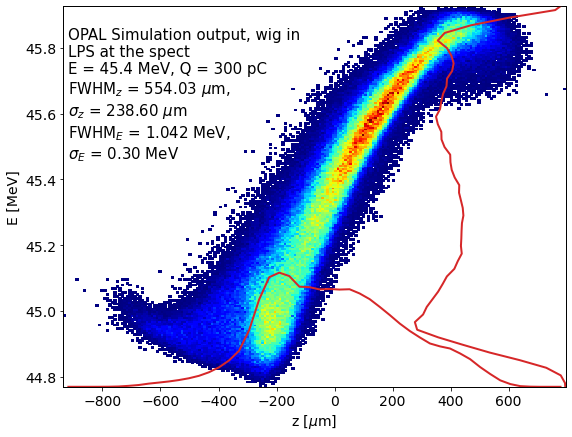

In [48]:
# We now plot the results from the forward simulation with the wiggler, and store the phase-space.

fig, ax = plt.subplots(1,1, figsize = (9, 7))

# Plot final LPS of simulation.
f = h5py.File(sim_path + '/wiggler/wig.h5', 'r')
print('spos = ', f['Step#0'].attrs['SPOS'])
dfloc = pd.DataFrame({'x':np.asarray(f['Step#0/x']),
                   'px':np.asarray(f['Step#0/px']),
                   'y':np.asarray(f['Step#0/y']),
                   'py':np.asarray(f['Step#0/py']),
                   'z':np.asarray(f['Step#0/z']),
                   'pz':np.asarray(f['Step#0/pz']),
                  })
x = dfloc['z']
y = dfloc['px']**2
y += dfloc['py']**2
y += dfloc['pz']**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
###############################
# Store in a csv.
outFile = sim_path + '/wiggler/LPS_output.tsv'
print('\nSaving particles in file...')
## Write the distribution
df = pd.DataFrame({'z':dfloc['z'],
                   'pz':dfloc['pz'],
                  })
df.to_csv(outFile, sep = '\t', index = False, mode = 'w')
###############################
pmf.plotScreenXY(ax, x, y, ['z', 'E'], type = 'hist2d-hist', factors = [1e6, 1e-6], nbins = 200, color = 3, maxHH = maxHH, enable_cbar = 0)
# Text with info
ax.text(.01, .55, 'OPAL Simulation output, wig in \nLPS at the spect\n' +
           'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
           'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
           'FWHM$_E$ = {:.3f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
           fontsize = 15, color = 'black', transform = ax.transAxes)

# Save the image
# plt.savefig((pltpath + '/OPAL_wigIn_case3.png'),bbox_inches='tight')
plt.show()

## Wiggler in

Getting LPS
Getting Spect only
Getting TDC only
Replacing the E distribution with the one from the spectrometer

 Interpolating...
generating particles...
0 particles have been generated
50000 particles have been generated
100000 particles have been generated
150000 particles have been generated
200000 particles have been generated
250000 particles have been generated
300000 particles have been generated
350000 particles have been generated
400000 particles have been generated
450000 particles have been generated
Finally we have 438037 particles


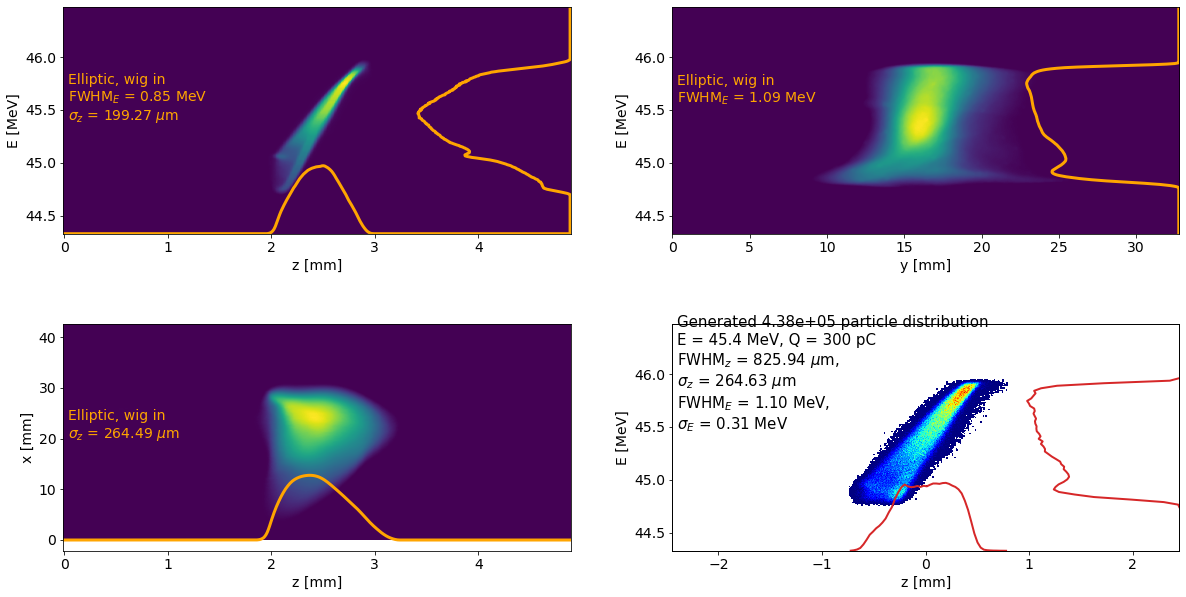

In [49]:
# Generate (z,pz) phase-space distribution from the shots on YAG5 and YAG6.

fig,axs = plt.subplots(2,2, figsize = (20,10))
fig.subplots_adjust(hspace=0.4)
    
np.random.seed(42)   

pmf.sample_3Ms(axs, LPS_fn = sim_path + '/average_wigIn_LPS.txt', 
           specton_fn = sim_path + '/average_wigIn_specton.txt', 
          TDCon_fn = sim_path + '/average_wigIn_TDCon.txt',
          out_fn = sim_path + '/wiggler/true_wigIn_LPS.tsv', Npart = 5*10**5,
          casename = 'Elliptic, wig in', show_info = True, plot_trafos = False, 
               sample = True)

# plt.savefig(pltpath + '/LPS_DYG14_case3_wigIn.png', bbox_inches = 'tight')
plt.show()

# Final Comparison

FWHME 0.9301765771703934
FWHME 1.100604883553631
FWHME 1.041553978772597


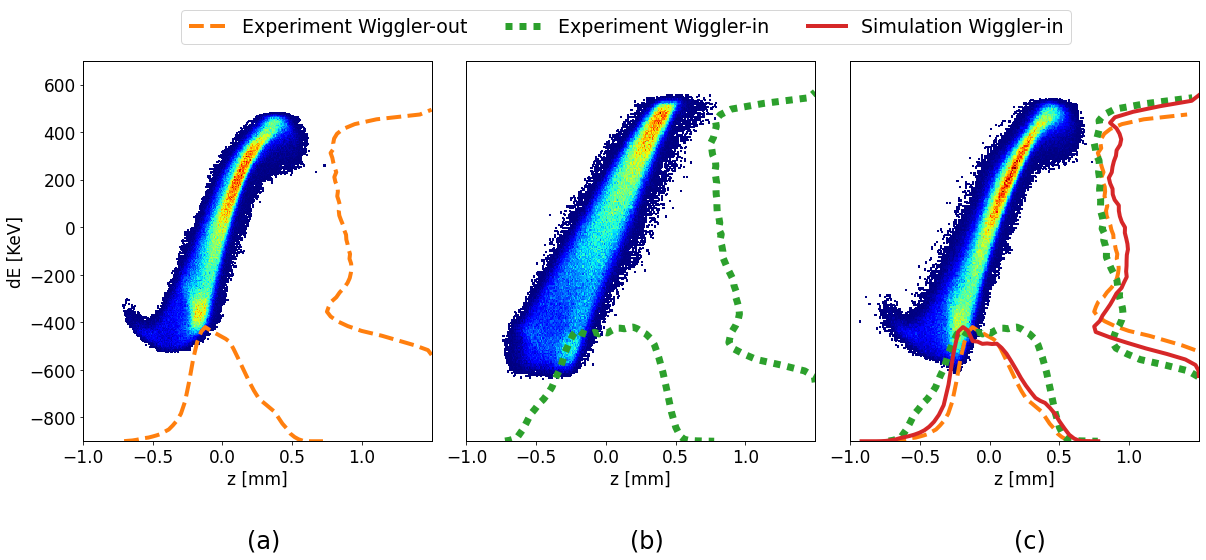

In [51]:
fig, ax = plt.subplots(1,3, figsize = (20, 7))
fig.subplots_adjust(wspace=.1)
ax = ax.reshape(-1)
maxHH = 0.3
customLines = []

# Plot wig out at the spectrometer, experimental shot.
lsLoc = (0, (5, 1))
lsLoc = '--'
lwLoc = 4
fn = sim_path + '/back_track_drift/initDist.dat'
df = pd.read_csv(fn, skiprows = 1, sep = r'\s+', names = ['z', 'pz'])
x = df['z']
y = np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
y -= np.mean(y) # Absolute energy can't be known, so we only look at energy spread.
# y += 25*1e3  # Adjust it vertically so it is well-aligned with the other plots. We are only interested in comparing dE, so we can shift vertically without problem.
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist)
FWHME *= 1e-6
print('FWHME', FWHME)
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[0], x, y, ['z', 'E'], type = 'hist2d-hist', factors = [1e3, 1e-3], 
                 nbins = 200, color = 11, maxHH = maxHH, enable_cbar = 0, lw = lwLoc, ls = lsLoc)
ax[0].set_ylabel('dE [KeV]', fontsize = fs)
pmf.histAx(ax[2], x, axis = 0, bins = 50, maxHH = maxHH, ls = lsLoc, lw = lwLoc, color = 'C11', zorder = 5)
pmf.histAx(ax[2], y, axis = 1, bins = 50, maxHH = maxHH, flip = False, ls = lsLoc, lw = lwLoc, 
       color = 'C11', zorder = 5)
# Text with info
# ax[0].text(.01, .55, 'Experiment LPS,wig out \nat EYG13\n' +
#            'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
#            'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
#            'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
#            fontsize = 15, color = 'black', transform = ax[0].transAxes)
customLines.append(Line2D([0], [0], color = 'C11', lw = lwLoc, ls = lsLoc))


# Plot wig in at the spectrometer, experimental shot.
lsLoc = (0, (1,1))
lwLoc = 7
fn = sim_path + '/wiggler/true_wigIn_LPS.tsv'
df = pd.read_csv(fn, skiprows = 1, sep = r'\s+', names = ['z', 'pz'])
x = df['z']
y = np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
y -= np.mean(y) # Absolute energy can't be known, so we only look at energy spread.
# y += 25*1e3
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist)
FWHME *= 1e-6
print('FWHME', FWHME)
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[1], x, y, ['z', 'E'], type = 'hist2d-hist', factors = [1e3, 1e-3], 
                 nbins = 200, color = 2, maxHH = maxHH, enable_cbar = 0, lw = lwLoc, ls = lsLoc)
ax[1].set_ylabel('', fontsize = fs)
pmf.histAx(ax[2], x, axis = 0, bins = 50, maxHH = maxHH, ls = lsLoc, lw = lwLoc, color = 'C2', zorder = 5)
pmf.histAx(ax[2], y, axis = 1, bins = 50, maxHH = maxHH, flip = False, 
       ls = lsLoc, lw = lwLoc, color = 'C2', zorder = 5)
# Text with info
# ax[1].text(.01, .55, 'Experiment LPS,wig in \nat EYG13\n' +
#            'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
#            'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
#            'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
#            fontsize = 15, color = 'black', transform = ax[1].transAxes)
customLines.append(Line2D([0], [0], color = 'C2', lw = lwLoc, ls = lsLoc))


# Plot wig in at the spectrometer, simulation.
lsLoc = '-'
lwLoc = 4
fn = sim_path + '/wiggler/LPS_output.tsv'
df = pd.read_csv(fn, skiprows = 1, sep = r'\s+', names = ['z', 'pz'])
x = df['z']
y = np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
y -= np.mean(y) # Absolute energy can't be known, so we only look at energy spread.
y -= 15*1e3  # Adjust it vertically so it is well-aligned with the other plots. We are only interested in comparing dE, so we can shift vertically without problem.
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist)
FWHME *= 1e-6
print('FWHME', FWHME)
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[2], x, y, ['z', 'E'], type = 'hist2d-hist', factors = [1e3, 1e-3], 
                 nbins = 200, color = 3, maxHH = maxHH, enable_cbar = 0, lw = lwLoc, ls = lsLoc)
ax[2].set_ylabel('', fontsize = fs)
# Text with info
# ax[2].text(.01, .55, 'Simulation LPS, wig in \nat EYG13\n' +
#            'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
#            'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
#            'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
#            fontsize = 15, color = 'black', transform = ax[2].transAxes)
customLines.append(Line2D([0], [0], color = 'C3', lw = lwLoc, ls = lsLoc))


# Custom legend
fig.legend(customLines, ['Experiment Wiggler-out', 'Experiment Wiggler-in', 'Simulation Wiggler-in'], 
           fontsize = fs+2, loc = (0.15, 0.92), ncol = 3)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
for i in range(3):
    ax[i].tick_params(axis = 'both', labelsize = fs)
    ax[i].set_xlim([-1.0, 1.5])
    ax[i].set_ylim([-900, 700])
    if i > 0:
        ax[i].set_yticks([])
ax[0].text(0.47, -0.28, '(a)', fontsize = fs+7, transform = ax[0].transAxes)
ax[1].text(0.47, -0.28, '(b)', fontsize = fs+7, transform = ax[1].transAxes)
ax[2].text(0.47, -0.28, '(c)', fontsize = fs+7, transform = ax[2].transAxes)
for i in range(3):
    ax[i].tick_params( axis = 'both', labelsize = fs )
    ax[i].set_xlabel('z [mm]', fontsize = fs)
    ax[i].set_xticks([-1,-.5,0,.5,1])

# Save the image
# plt.savefig((pltpath + '/finalComparison_case3.png'),bbox_inches='tight')
plt.show()

In [137]:
np.linspace(0+.1,1-.1,5)

array([0.1, 0.3, 0.5, 0.7, 0.9])